In [1]:
# pip install pandas, numpy, matplotlib, seaborn, opencv-python

In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import os

In [3]:
# Load metadata
data_path = Path.cwd().parent.parent.joinpath("image_data")
metadata_path = data_path.joinpath("CheXpert-v1.0-small/train.csv")
metadata = pd.read_csv(metadata_path)

# Check the first few rows
print(metadata.head())


                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN     

In [4]:
print(metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidation               70622 non-null   float64
 12  Pneumonia                   27608 non-null   float64
 13  Atelectasis   

| Column Name                      | Description                                                                                                         |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------|
| **Path**                         | The file path to the chest X-ray image, indicating the location of the image in the dataset.                      |
| **Sex**                          | The biological sex of the patient, recorded as either 'Male' or 'Female'.                                        |
| **Age**                          | The age of the patient in years, providing insight into the demographics of the dataset.                          |
| **Frontal/Lateral**              | The view of the chest X-ray, indicating whether the image was taken from the front (Frontal) or the side (Lateral).|
| **AP/PA**                        | The type of chest X-ray projection, where 'AP' stands for Anteroposterior and 'PA' stands for Posteroanterior.    |
| **No Finding**                   | A binary indicator (1.0 or NaN) representing whether there are no significant findings in the X-ray.               |
| **Enlarged Cardiomediastinum**  | A binary indicator (1.0 or NaN) for the presence of an enlarged cardiomediastinum, which may suggest cardiovascular conditions. |
| **Cardiomegaly**                | A binary indicator (1.0 or NaN) indicating whether cardiomegaly (enlargement of the heart) is present in the X-ray. |
| **Lung Opacity**                | A binary indicator (1.0 or NaN) that indicates the presence of lung opacity, which may signify various pulmonary conditions. |
| **Lung Lesion**                 | A binary indicator (1.0 or NaN) for the presence of lung lesions, which can be indicative of tumors or other abnormalities. |
| **Edema**                        | A binary indicator (1.0 or NaN) indicating the presence of pulmonary edema, characterized by excess fluid in the lungs. |
| **Consolidation**               | A binary indicator (1.0 or NaN) representing whether lung consolidation is present, which may indicate pneumonia or other lung infections. |
| **Pneumonia**                   | A binary indicator (1.0 or NaN) for the presence of pneumonia, reflecting acute lung inflammation.                  |
| **Atelectasis**                 | A binary indicator (1.0 or NaN) indicating the presence of atelectasis, which is the collapse or incomplete expansion of the lung. |
| **Pneumothorax**                | A binary indicator (1.0 or NaN) for the presence of pneumothorax, which is the presence of air in the pleural space. |
| **Pleural Effusion**            | A binary indicator (1.0 or NaN) indicating the presence of pleural effusion, the accumulation of fluid in the pleural cavity. |
| **Pleural Other**               | A binary indicator (1.0 or NaN) for other pleural conditions that do not fall under specific categories.           |
| **Fracture**                    | A binary indicator (1.0 or NaN) indicating the presence of a fracture visible in the X-ray.                       |
| **Support Devices**             | A binary indicator (1.0 or NaN) representing the presence of any medical support devices (e.g., tubes, catheters) observed in the X-ray. |


In [5]:
metadata.describe()

,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
count,223414.000000,22381.0,44839.000000,46203.000000,117778.000000,11944.000000,85956.000000,70622.000000,27608.000000,68443.000000,78934.000000,133211.000000,6492.000000,12194.000000,123217.000000
mean,60.430653,1.0,-0.035795,0.409346,0.848911,0.644508,0.456769,-0.183498,-0.461134,-0.005304,0.206540,0.559706,0.134011,0.688699,0.932680
std,17.820925,0.0,0.718442,0.769323,0.472571,0.691607,0.741785,0.753980,0.828249,0.990244,0.493529,0.648859,0.966183,0.565435,0.283377
min,0.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,1.0,-1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000
50%,62.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,74.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#### Checking Missing Values 
print(metadata.isnull().sum())

# The dataset contains a significant number of missing values across various columns. We will have to decide on how to deal with that.

Path                               0
Sex                                0
Age                                0
Frontal/Lateral                    0
AP/PA                          32387
No Finding                    201033
Enlarged Cardiomediastinum    178575
Cardiomegaly                  177211
Lung Opacity                  105636
Lung Lesion                   211470
Edema                         137458
Consolidation                 152792
Pneumonia                     195806
Atelectasis                   154971
Pneumothorax                  144480
Pleural Effusion               90203
Pleural Other                 216922
Fracture                      211220
Support Devices               100197
dtype: int64


### Basic Distributions

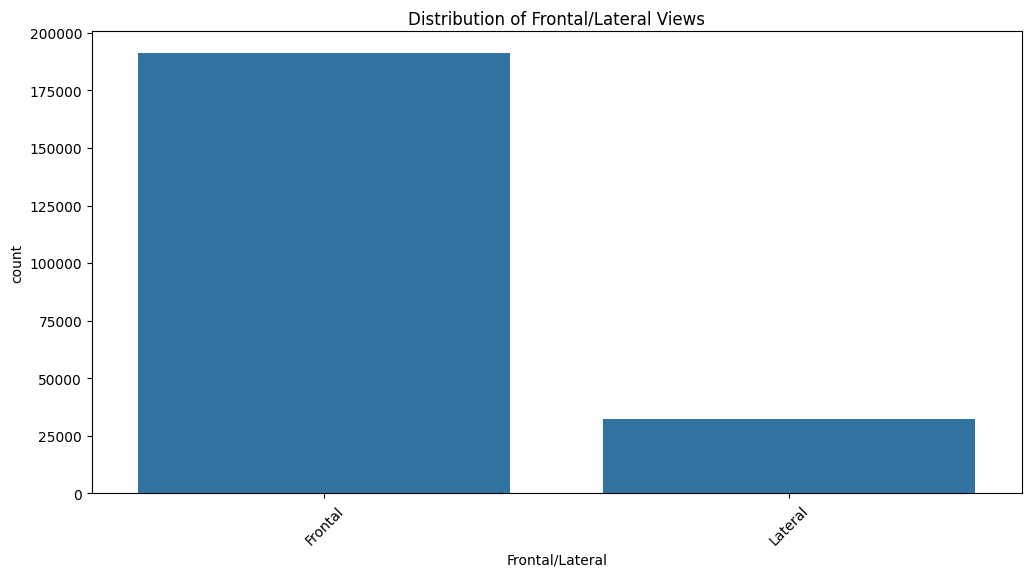

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=metadata, x='Frontal/Lateral', order=metadata['Frontal/Lateral'].value_counts().index)
plt.title('Distribution of Frontal/Lateral Views')
plt.xticks(rotation=45)
plt.show()


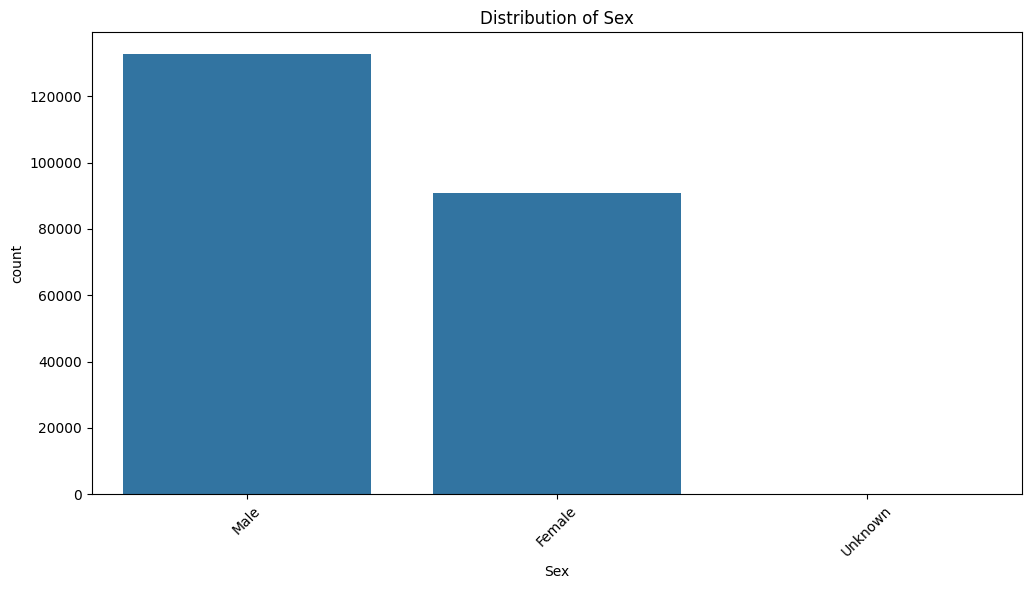

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=metadata, x='Sex', order=metadata['Sex'].value_counts().index)
plt.title('Distribution of Sex')
plt.xticks(rotation=45)
plt.show()


In [9]:
metadata['Sex'].value_counts()

# We could decide on removing the row or replacing it with the mode (Male), what do you think?

Sex
Male       132636
Female      90777
Unknown         1
Name: count, dtype: int64

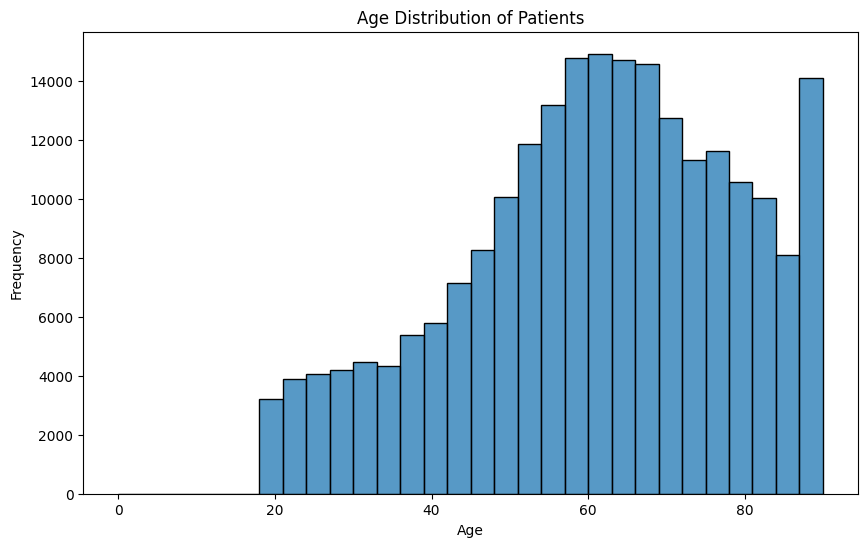

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(metadata['Age'], bins=30, kde=False)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


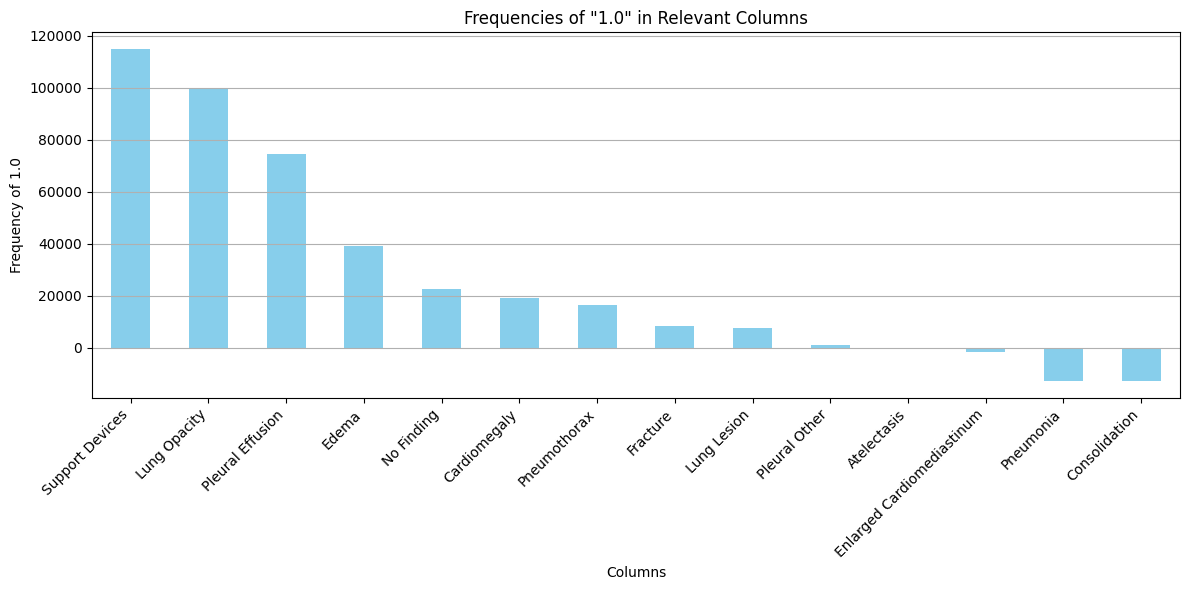

In [11]:
data_counts = {
    "No Finding": metadata["No Finding"].sum(),
    "Enlarged Cardiomediastinum": metadata["Enlarged Cardiomediastinum"].sum(),
    "Cardiomegaly": metadata["Cardiomegaly"].sum(),
    "Lung Opacity": metadata["Lung Opacity"].sum(),
    "Lung Lesion": metadata["Lung Lesion"].sum(),
    "Edema": metadata["Edema"].sum(),
    "Consolidation": metadata["Consolidation"].sum(),
    "Pneumonia": metadata["Pneumonia"].sum(),
    "Atelectasis": metadata["Atelectasis"].sum(),
    "Pneumothorax": metadata["Pneumothorax"].sum(),
    "Pleural Effusion": metadata["Pleural Effusion"].sum(),
    "Pleural Other": metadata["Pleural Other"].sum(),
    "Fracture": metadata["Fracture"].sum(),
    "Support Devices": metadata["Support Devices"].sum()
}

# Convert the counts to a DataFrame
frequencies = pd.Series(data_counts)

# Create the barplot
plt.figure(figsize=(12, 6))
frequencies.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Frequencies of "1.0" in Relevant Columns')
plt.xlabel('Columns')
plt.ylabel('Frequency of 1.0')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

### Value Indicators in Medical Imaging Datasets

- **1.0**: Indicates that the condition is present (positive finding).
- **0.0**: Indicates that the condition is absent (negative finding).
- **NaN**: Indicates that the information is missing or not available (not applicable).
- **-1.0**: Indicates that the condition was not assessed or that the information is inconclusive (i.e., the model could not determine the presence or absence of the condition for that particular instance). The presence of several `-1.0` values for different conditions suggests that the assessment for those conditions was not made or could not be conclusively determined based on the available data.


### Correation Analysis

In [12]:
metadata_num = metadata.select_dtypes(include=['number'])

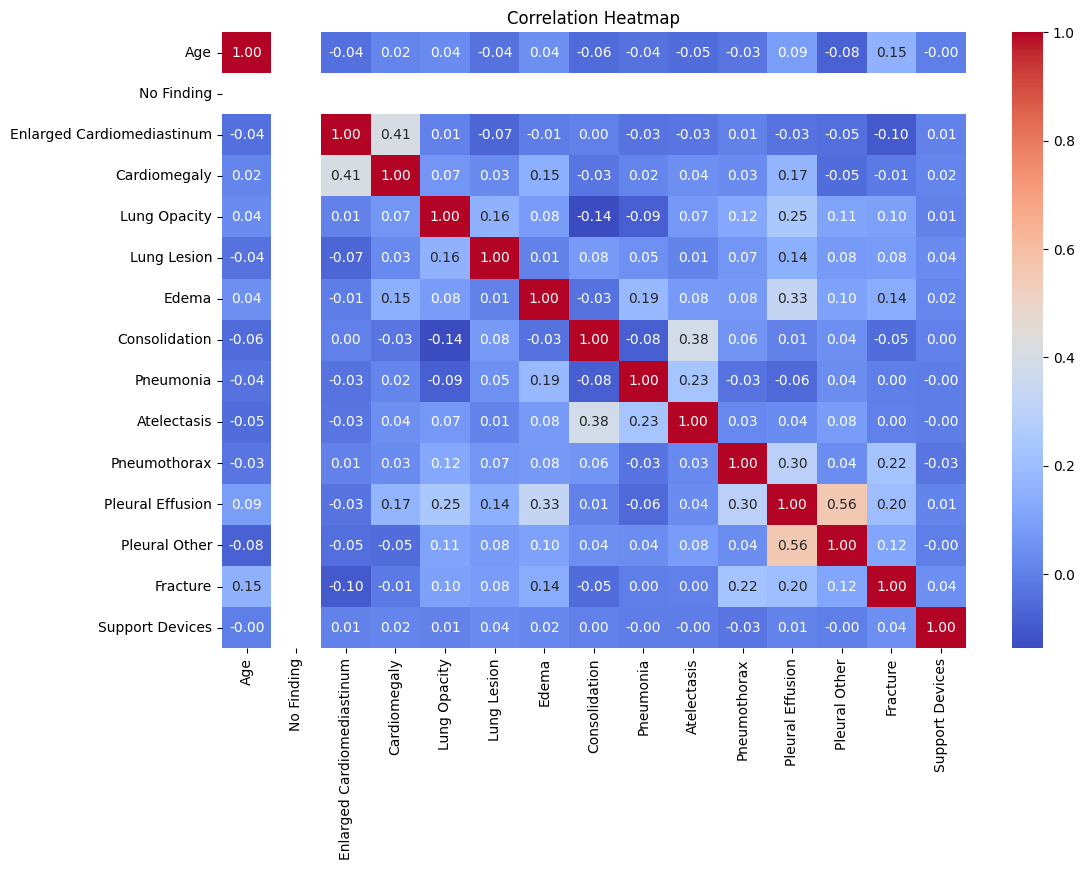

In [13]:
plt.figure(figsize=(12, 8))
correlation_matrix = metadata_num.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### We have to handle NaN's and -1.0s better probably.

### Explore Images

(320, 389, 3)
(320, 320, 3)
(320, 369, 3)
(320, 320, 3)
(369, 320, 3)
(320, 320, 3)


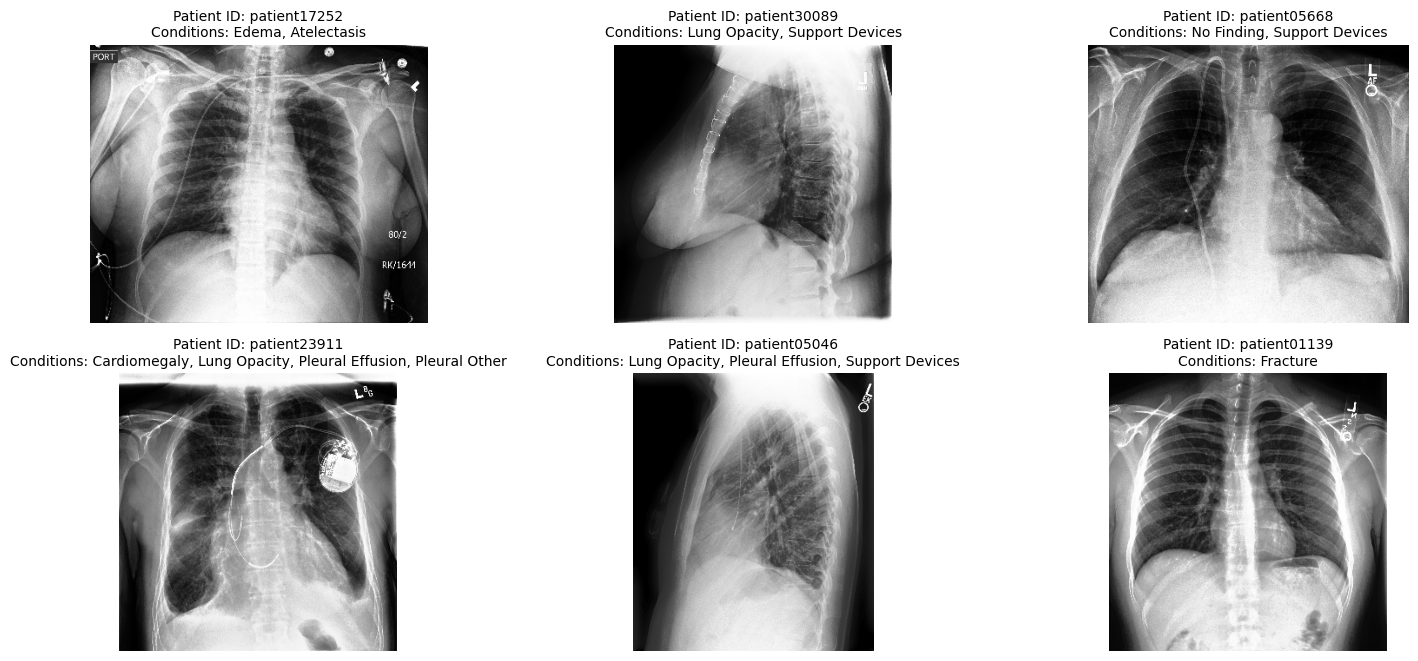

In [15]:
def display_images_with_captions(image_paths, metadata, metadata_num, base_dir="archive", cols=3, row_space=0.5):
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(image_paths):
        # Prepend the base directory to the image path
        full_path = os.path.join(base_dir, img_path)
        img = cv2.imread(full_path)
        print(img.shape)
        
        if img is None:
            print(f"Image at path {full_path} could not be loaded.")
            continue

        # Extract patient ID from the folder name in the image path
        patient_id = img_path.split('/')[2]  # Assuming "train/patientID/studyX/image.png" format

        # Get the corresponding row in metadata for this image
        row = metadata[metadata['Path'] == img_path].iloc[0]
        
        # Find columns in metadata_num where the value is 1.0
        positive_conditions = metadata_num.loc[row.name] == 1.0
        conditions = positive_conditions[positive_conditions].index.tolist()
        
        # Generate caption
        caption = f"Patient ID: {patient_id}\nConditions: {', '.join(conditions)}"
        
        # Display image with caption
        plt.subplot(len(image_paths) // cols + 1, cols, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(caption, fontsize=10)
        plt.axis('off')
        
    # Adjust subplot parameters for spacing
    plt.subplots_adjust(hspace=row_space)
    plt.tight_layout()
    plt.show()

# Display sample images with captions
sample_images = metadata['Path'].sample(6).tolist()  
display_images_with_captions(sample_images, metadata, metadata_num, base_dir=data_path)

In [24]:
### "Patient_ID" could be useful in the future (if we decide to remove rows with missing values or w/e), so adding it as a column in metadata 

# Function to extract patient ID from the image path
def extract_patient_id(path):
    return path.split('/')[2]  # Adjust the index based on your path structure

# Apply the function
metadata['Patient_ID'] = metadata['Path'].apply(extract_patient_id)

# Display the updated df
print(metadata.head())

                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN     

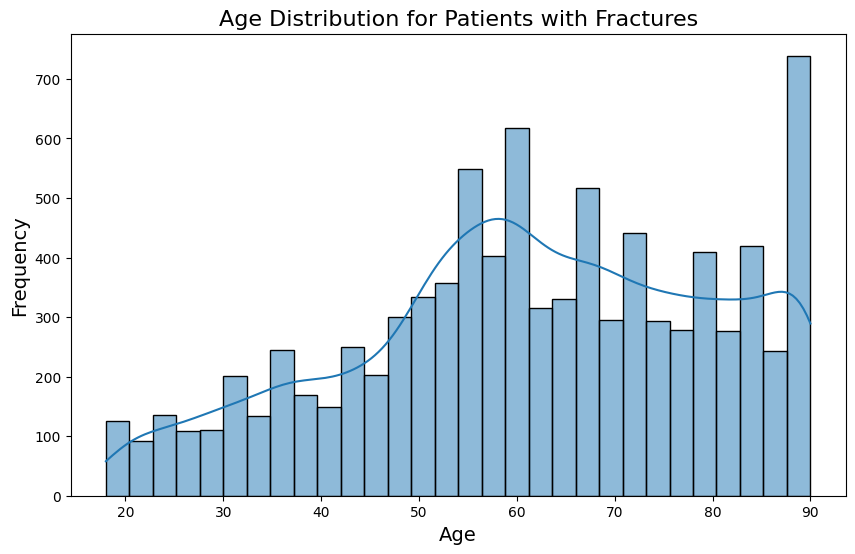

In [25]:
### Plot for Age Distribution for Patients with Fractures

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(metadata[metadata['Fracture'] == 1.0]['Age'], kde=True, bins=30)

# Add titles and labels
plt.title('Age Distribution for Patients with Fractures', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()